# Veri Görselleştirme

● MatPlotLib => Bu kütüphane analizleri grafik ile görselleştirebilmemizi sağlar.

● Seaborn => MatPlotLib kütüphanesini temel alır. MatPlotLib'e göre daha görselleştirilmiş grafikler sunar.

## 1. Veriye İlk Bakış

In [4]:
import seaborn as sns
import pandas as pd

df=pd.read_csv("dataset/youtubeGB.csv") 
youtube=df.copy()

In [2]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [4]:
# Öncelikle yukarıda object olarak görünen değişkenleri kategorik değişkenlere çevirelim.
youtube.video_id=pd.Categorical(youtube.video_id)
youtube.trending_date=pd.Categorical(youtube.trending_date)
youtube.title=pd.Categorical(youtube.title)
youtube.channel_title=pd.Categorical(youtube.channel_title)
youtube.publish_time=pd.Categorical(youtube.publish_time)
youtube.tags=pd.Categorical(youtube.tags)
youtube.thumbnail_link=pd.Categorical(youtube.thumbnail_link)
youtube.description =pd.Categorical(youtube.description )
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   video_id                38916 non-null  category
 1   trending_date           38916 non-null  category
 2   title                   38916 non-null  category
 3   channel_title           38916 non-null  category
 4   category_id             38916 non-null  int64   
 5   publish_time            38916 non-null  category
 6   tags                    38916 non-null  category
 7   views                   38916 non-null  int64   
 8   likes                   38916 non-null  int64   
 9   dislikes                38916 non-null  int64   
 10  comment_count           38916 non-null  int64   
 11  thumbnail_link          38916 non-null  category
 12  comments_disabled       38916 non-null  bool    
 13  ratings_disabled        38916 non-null  bool    
 14  video_error_or_removed

## 2. Veri Setinin Betimlenmesi

In [16]:
youtube.describe().T  # Eksik gözlemleri göz ardı eder ve kategorik değişkenleri görmezden gelir.

,count,mean,std,min,25%,50%,75%,max
category_id,38916.0,1.682794e+01,7.752728e+00,1.0,10.00,20.0,24.00,43.0
views,38916.0,5.911944e+06,1.900121e+07,851.0,251527.25,981889.0,3683628.50,424538912.0
likes,38916.0,1.345196e+05,3.499893e+05,0.0,5897.00,25182.5,114089.25,5613827.0
dislikes,38916.0,7.612560e+03,5.095683e+04,0.0,200.00,821.0,3357.50,1944971.0
comment_count,38916.0,1.308835e+04,5.066740e+04,0.0,679.00,2478.0,9241.50,1626501.0


## 3. Eksik Değerlerin İncelenmesi

In [5]:
# Hangi kolonda kaç tane eksik veri var?
result=youtube.isnull().sum()
print(result)

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64


In [18]:
# Öncelikle description olanında null olan değerleri "no input" ile doldurduk. Ardından bu şekilde doldurduğumuz 
# kayıtlardan ilk 25'ini listeledik.

youtube["description"].fillna(value="no input",inplace=True) 
youtube[youtube["description"]=="no input"][["title","description"]].head(25)

,title,description
91,Bone on Labour HQ,no input
118,Arvo Pärt - Tabula Rasa,no input
187,Brad Bufanda Demo Reel,no input
309,Bone on Labour HQ,no input
336,Arvo Pärt - Tabula Rasa,no input
394,Brad Bufanda Demo Reel,no input
521,Bone on Labour HQ,no input
546,Arvo Pärt - Tabula Rasa,no input
760,Bone on Labour HQ,no input
787,Arvo Pärt - Tabula Rasa,no input


## 4. Kategorik Değişken Özetleri

In [16]:
# video_id alanındaki kategorileri listeler.
result=youtube.video_id.unique()
print(result)

['Jw1Y-zhQURU' '3s1rvMFUweQ' 'n1WpP7iowLc' ... 'V15BYnSr0P8' 'BOhylL90UVQ'
 '14G7Qw5DC9M']


In [14]:
# video_id alanında toplam kaç kategori olduğunu hesaplar.
result=youtube["video_id"].value_counts().count()
print(result)

3272


AxesSubplot(0.125,0.11;0.775x0.77)


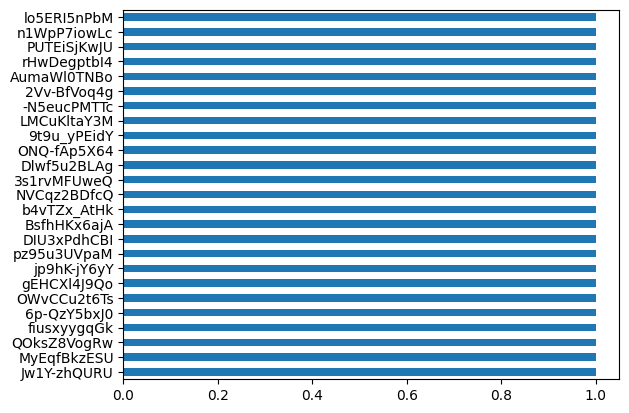

In [21]:
# video_id alanındaki kategorik değerleri grafik üzerinde gösterir
result=youtube["video_id"].head(25).value_counts().plot.barh() # çok fazla kayıt olduğu için sadece ilk 25 kaydı listeledik.
print(result)

## 5. Dağılım Grafikleri

### 5.1. Barplot (Sütun Grafik)

Text(0.5, 1.0, 'trending_date Değişkeninin Sınıf Frekansları')


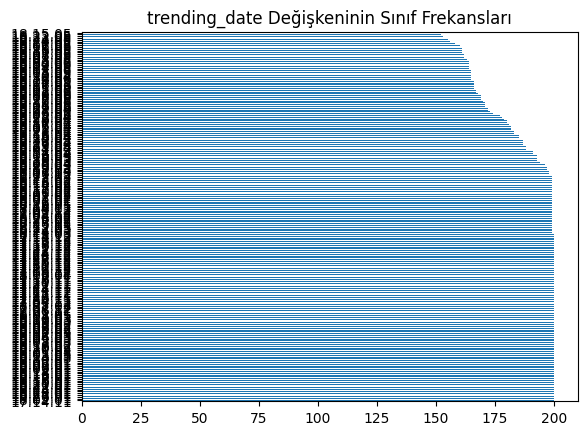

In [34]:
# Kayıtların trend olma tarihinin sınıf frekanslarını sütun grafiğinde gösterir.
result=youtube["trending_date"].value_counts().plot.barh().set_title("trending_date Değişkeninin Sınıf Frekansları")
print(result)

AxesSubplot(0.125,0.11;0.775x0.77)


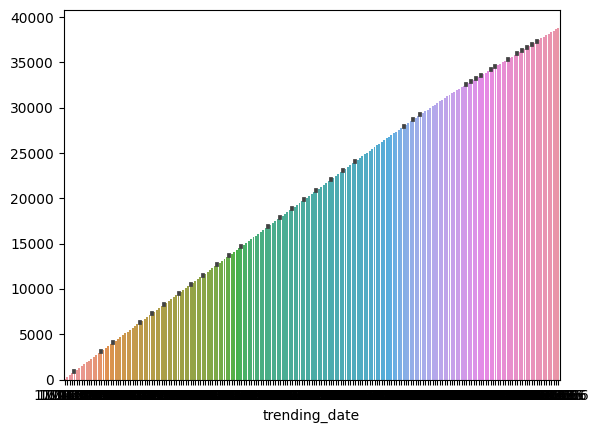

In [3]:
# Yukarıdaki işlemin aynısını seaborn kütüphanesiyle daha görsel bir şekilde görünmesini sağlayabiliriz.
import seaborn as sns
result=sns.barplot(x="trending_date", y=youtube.trending_date.index, data=youtube)
print(result)

### 5.1.1. Sütun Grafiklerinin Çaprazlanması

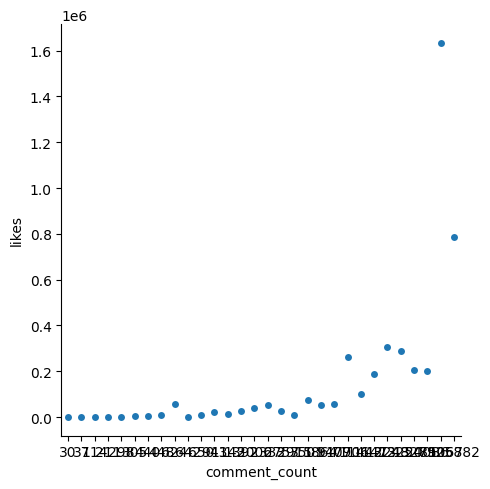

In [4]:
# Yorum sayısının beğeni ile ilişkisini gösterir (sadece ilk 30 kayıt için)
result=sns.catplot(x="comment_count",y="likes",data=youtube.head(30))
print(result)

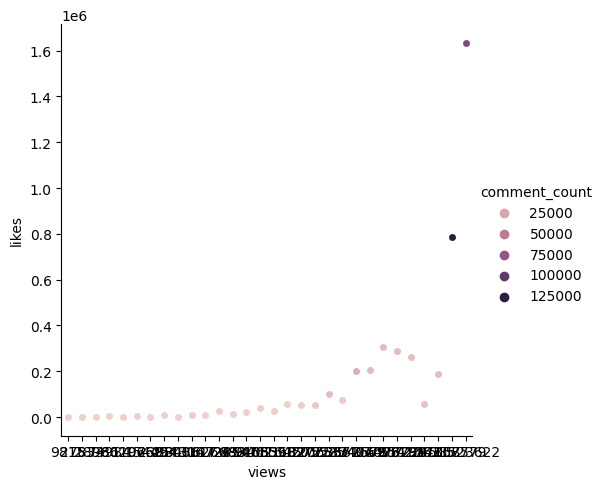

In [7]:
# Üstteki grafiği daha ayrıntılı görelim: DataFrame içine yorum sayısını atıp beğeni ve izlenme arasındaki ilişkiyi daha 
# ayrıntılı göstermektedir (ilk 30 kayıt için)

result=sns.catplot(x="views",y="likes",hue="comment_count" ,data=youtube.head(30))
print(result)

###### Yukarıdaki grafik sayesinde yorum sayısı fazla iken beğeni sayısının da fazla olduğunu, yorum sayısı düşük iken beğeni sayısının da düşük olduğunu gözlemlemekteyiz.

<AxesSubplot: xlabel='category_id,trending_date'>

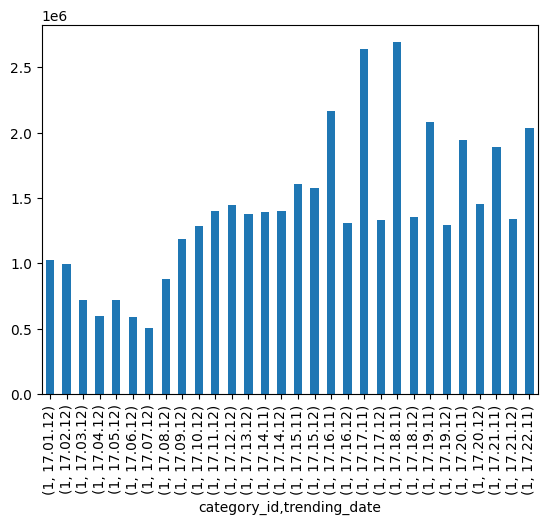

In [11]:
# İlk 30 kayıt için category_id ve trending_date gruplanarak views değişkeninin ortalamasını göstermektedir.
youtube.groupby(["category_id","trending_date"])["views"].mean().head(30).plot(kind="bar")

### 5.2. Histogram ve Yoğunluk Grafiği

Histogram ve yoğunluk grafikleri eldeki sayısal değişkenleri görselleştirmek için kullanılmaktadır. Sayısal değişkenlerin 
dağılımını ifade eder.

<AxesSubplot: xlabel='views', ylabel='Count'>

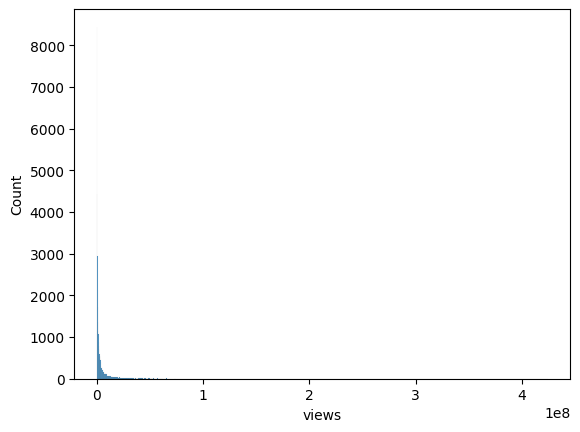

In [13]:
# İzlenmeleri histogram grafiğinde gösterir.
sns.histplot(youtube.views)

<AxesSubplot: xlabel='likes', ylabel='Count'>

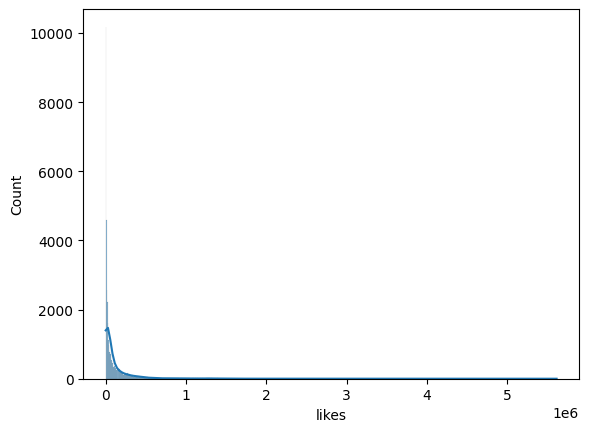

In [19]:
# Videoların beğeni sayısını olasılık yoğunluk fonksiyonu(kde=True) ile göstermektedir.
sns.histplot(youtube.likes,kde=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_14288\2051807850.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(youtube.comment_count, shade = True);


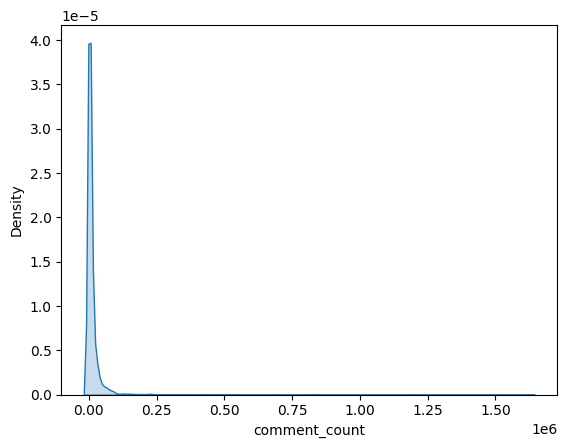

In [18]:
# Videolara ait yorum sayısının yoğunluk grafiğini göstermektedir.
sns.kdeplot(youtube.comment_count, shade = True);

### 5.2.1. Histogram Grafiklerinin Çaprazlanması

Veriseti içerisinde bulunan değişkenlerin ve etkilerinin birlikte değerlendirilmesini, kırılımların incelenmesini sağlar.

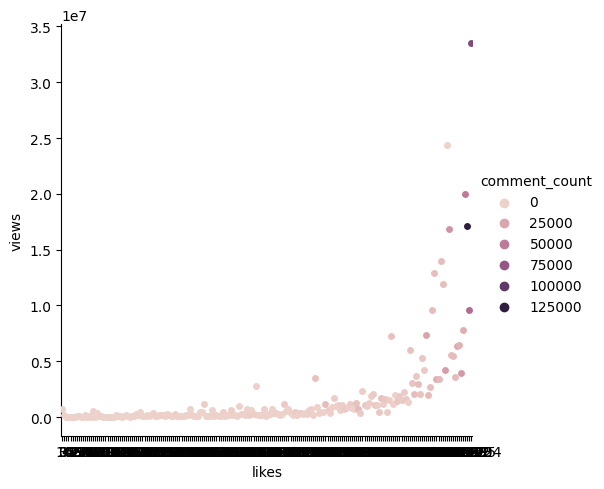

In [2]:
# Beğeni ve izlenme sayısını yorum sayısıyla ilişkili olarak göstermektedir (ilk 200 kayıt için)
sns.catplot(x="likes",y="views",hue="comment_count" ,data=youtube.head(200));

##### Not: Üstteki grafiğe baktığımızda yorum sayısı en fazla olması izlenme sayısının da fazla olmasıyla ilişkili olduğunu gözlemlemekteyiz.

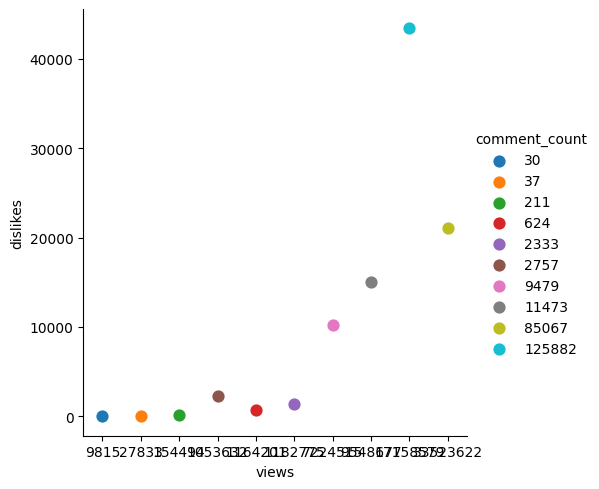

In [5]:
sns.catplot(x = "views", y = "dislikes", hue = "comment_count", kind = "point", data = youtube.head(10));

### 5.3. Boxplot (Kutu Grafiği)

Sayısal değişkenleri görselleştirmek için kullanılır.

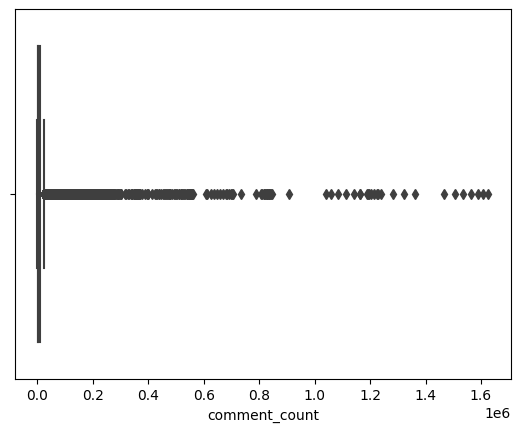

In [15]:
# Quartiller aracılığıyla yorum sayısına ait bilgileri göstermektedir.
sns.boxplot(x = youtube["comment_count"]);

##### Not: Yukarıdaki grafik soldan sağa doğru maksimuma ulaşmaktadır. Maksimuma doğru giden noktalar aykırı değerleri ifade etmektedir.

### 5.3.1. Boxplot (Kutu Grafiği) Çaprazlama

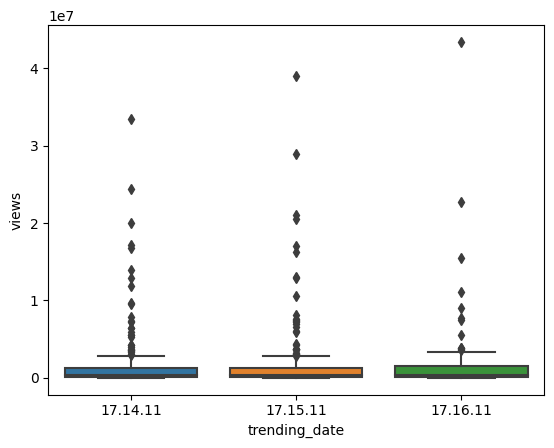

In [21]:
# İzlenme sayısına göre trend olma tarihi arasındaki ilişkiyi göstermektedir (ilk 30 kayıt için)
sns.boxplot(x = "trending_date", y = "views", data = youtube.head(500));

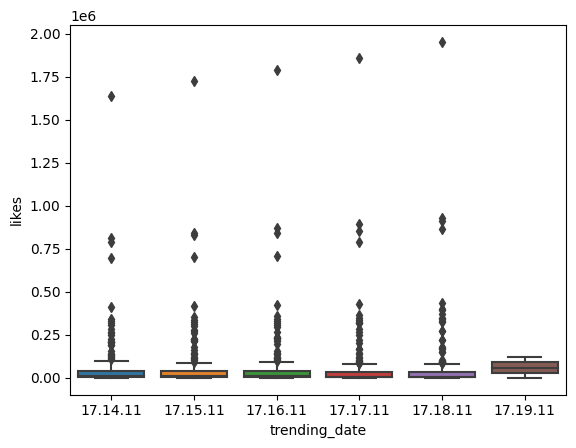

In [23]:
# Videonun trend olma tarihiyle ilgili beğeninin etkisi nedir? (ilk 1000 kayıt için)
sns.boxplot(x = "trending_date", y = "likes", data = youtube.head(1000));

### 5.4.  Violinplot (Violin Grafiği)

Violin grafiği Boxplota benzemekle birlikte yoğunluk anlamında bilgi sunar.

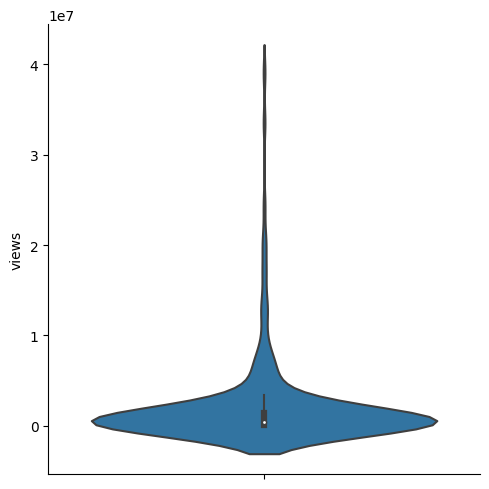

In [27]:
# İzlenme sayısının violin grafiğini göstermektedir (ilk 250 kayıt için)
sns.catplot(y = "views", kind = "violin", data = youtube.head(250));

## 6. Korelasyon Grafikleri

Korelasyon, değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terimdir.

### 6.1. Scatter Plot (Saçılım Grafiği)

Saçılım grafiği, sayısal değişkenler arasındaki ilişkiyi göstermektedir.

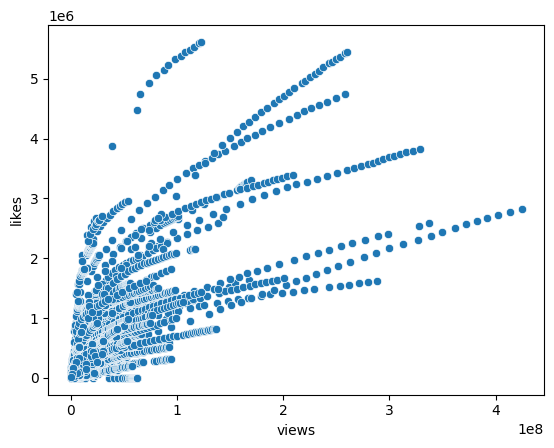

In [6]:
# Toplam izlenme sayısı ve beğeni sayısı arasındaki ilişkiyi gösteren saçılım grafiğidir.
sns.scatterplot(x = "views", y = "likes", data = youtube);

### 6.1.1. Scatter Plot Çaprazlama

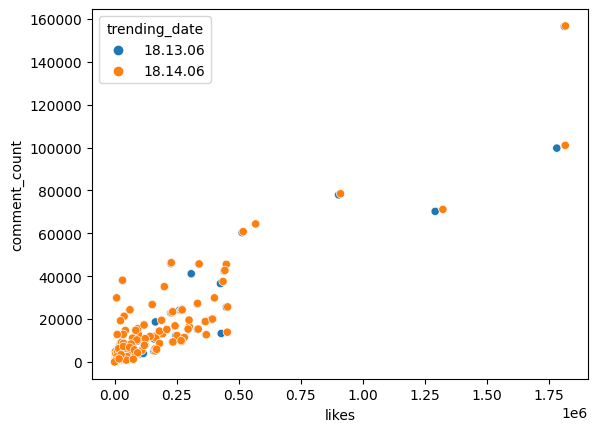

In [11]:
# Son 300 kayıt için beğeni ve yorum sayısının trend olma tarihiyle ilgili ilişkisini göstermektedir.
sns.scatterplot(x = "likes", y = "comment_count", hue = "trending_date",data = youtube.tail(300));

<AxesSubplot: xlabel='likes', ylabel='comment_count'>

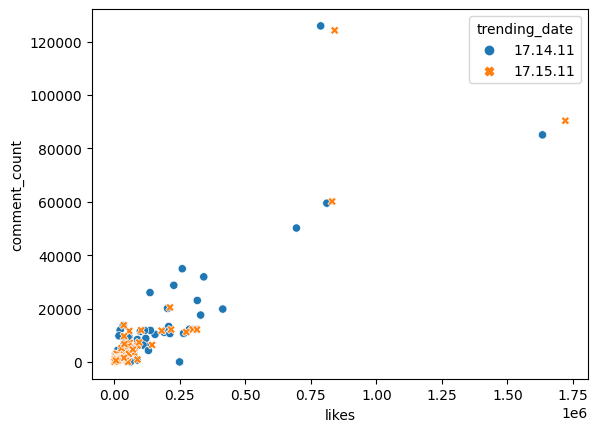

In [16]:
# İlk 300 kayıt için beğeni ve yorum sayısının trend olma tarihiyle ilgili ilişkisini farklı stil ile göstermektedir.
sns.scatterplot(x = "likes", y = "comment_count", hue = "trending_date", style="trending_date", data = youtube.head(300))

### 6.1.2. Doğrusal İlişkinin Gösterilmesi

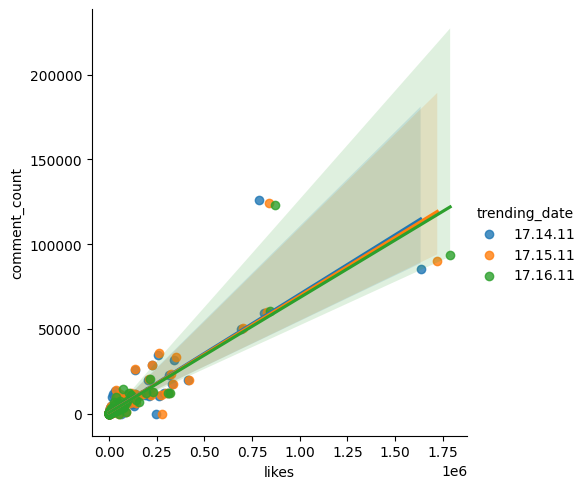

In [19]:
# İlk 500 kayıt için beğeni ve yorum sayısının trend olma tarihiyle ilgili ilişkisini doğrusal olarak göstermektedir.
sns.lmplot(x = "likes", y = "comment_count", hue = "trending_date",data = youtube.head(500)); 
# Yukarıdaki satırın en sonunda kullanılan noktalı virgül(;) grafik üzerinde çıkan bilginin gösterilmemesi içindir.

### 6.1.3. Scatterplot Matrisi

Sayısal değişkenler arasındaki ilişkiyi matris haline gösterme şeklidir

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


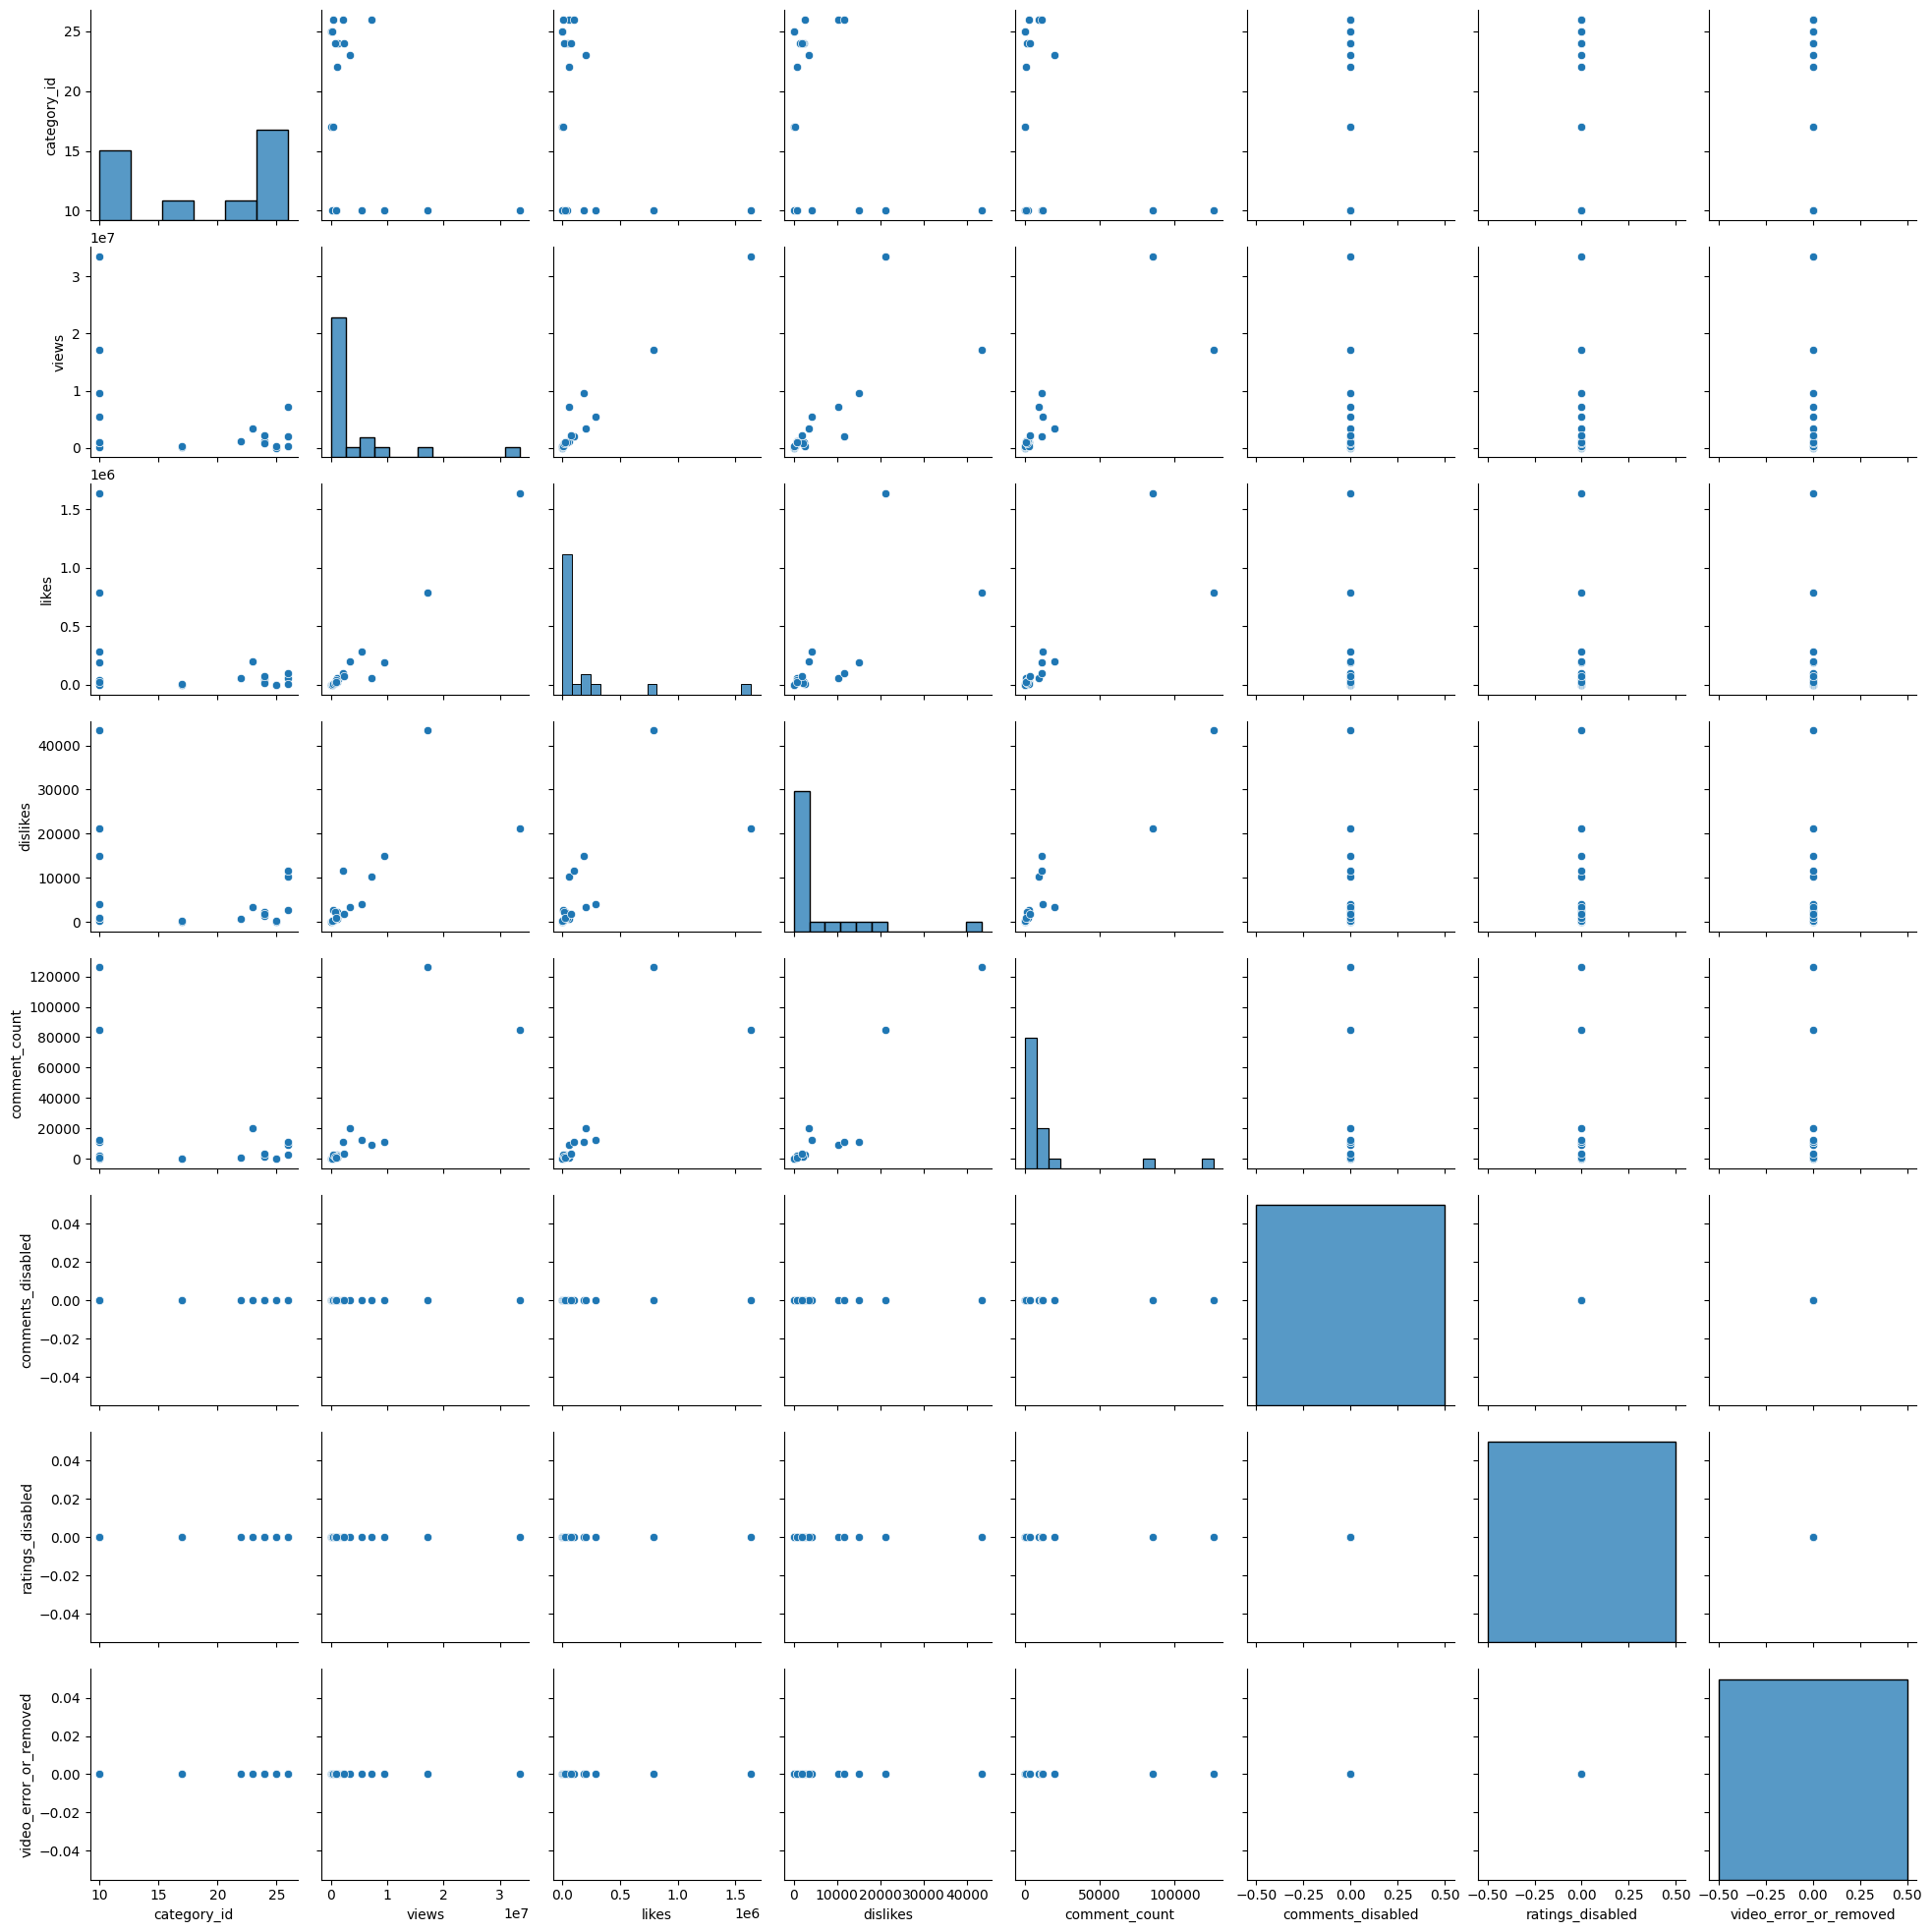

In [2]:
# Veri setindeki ilk 20 kayıt için matris sonuçlarını göstermektedir.
sns.pairplot(youtube.head(20));

#### Not: Yukarıdaki matrise baktığımızda örneğin izlenme sayısı artsa bile yorum yapma işleminin devre dışı özelliği değişmemektedir.

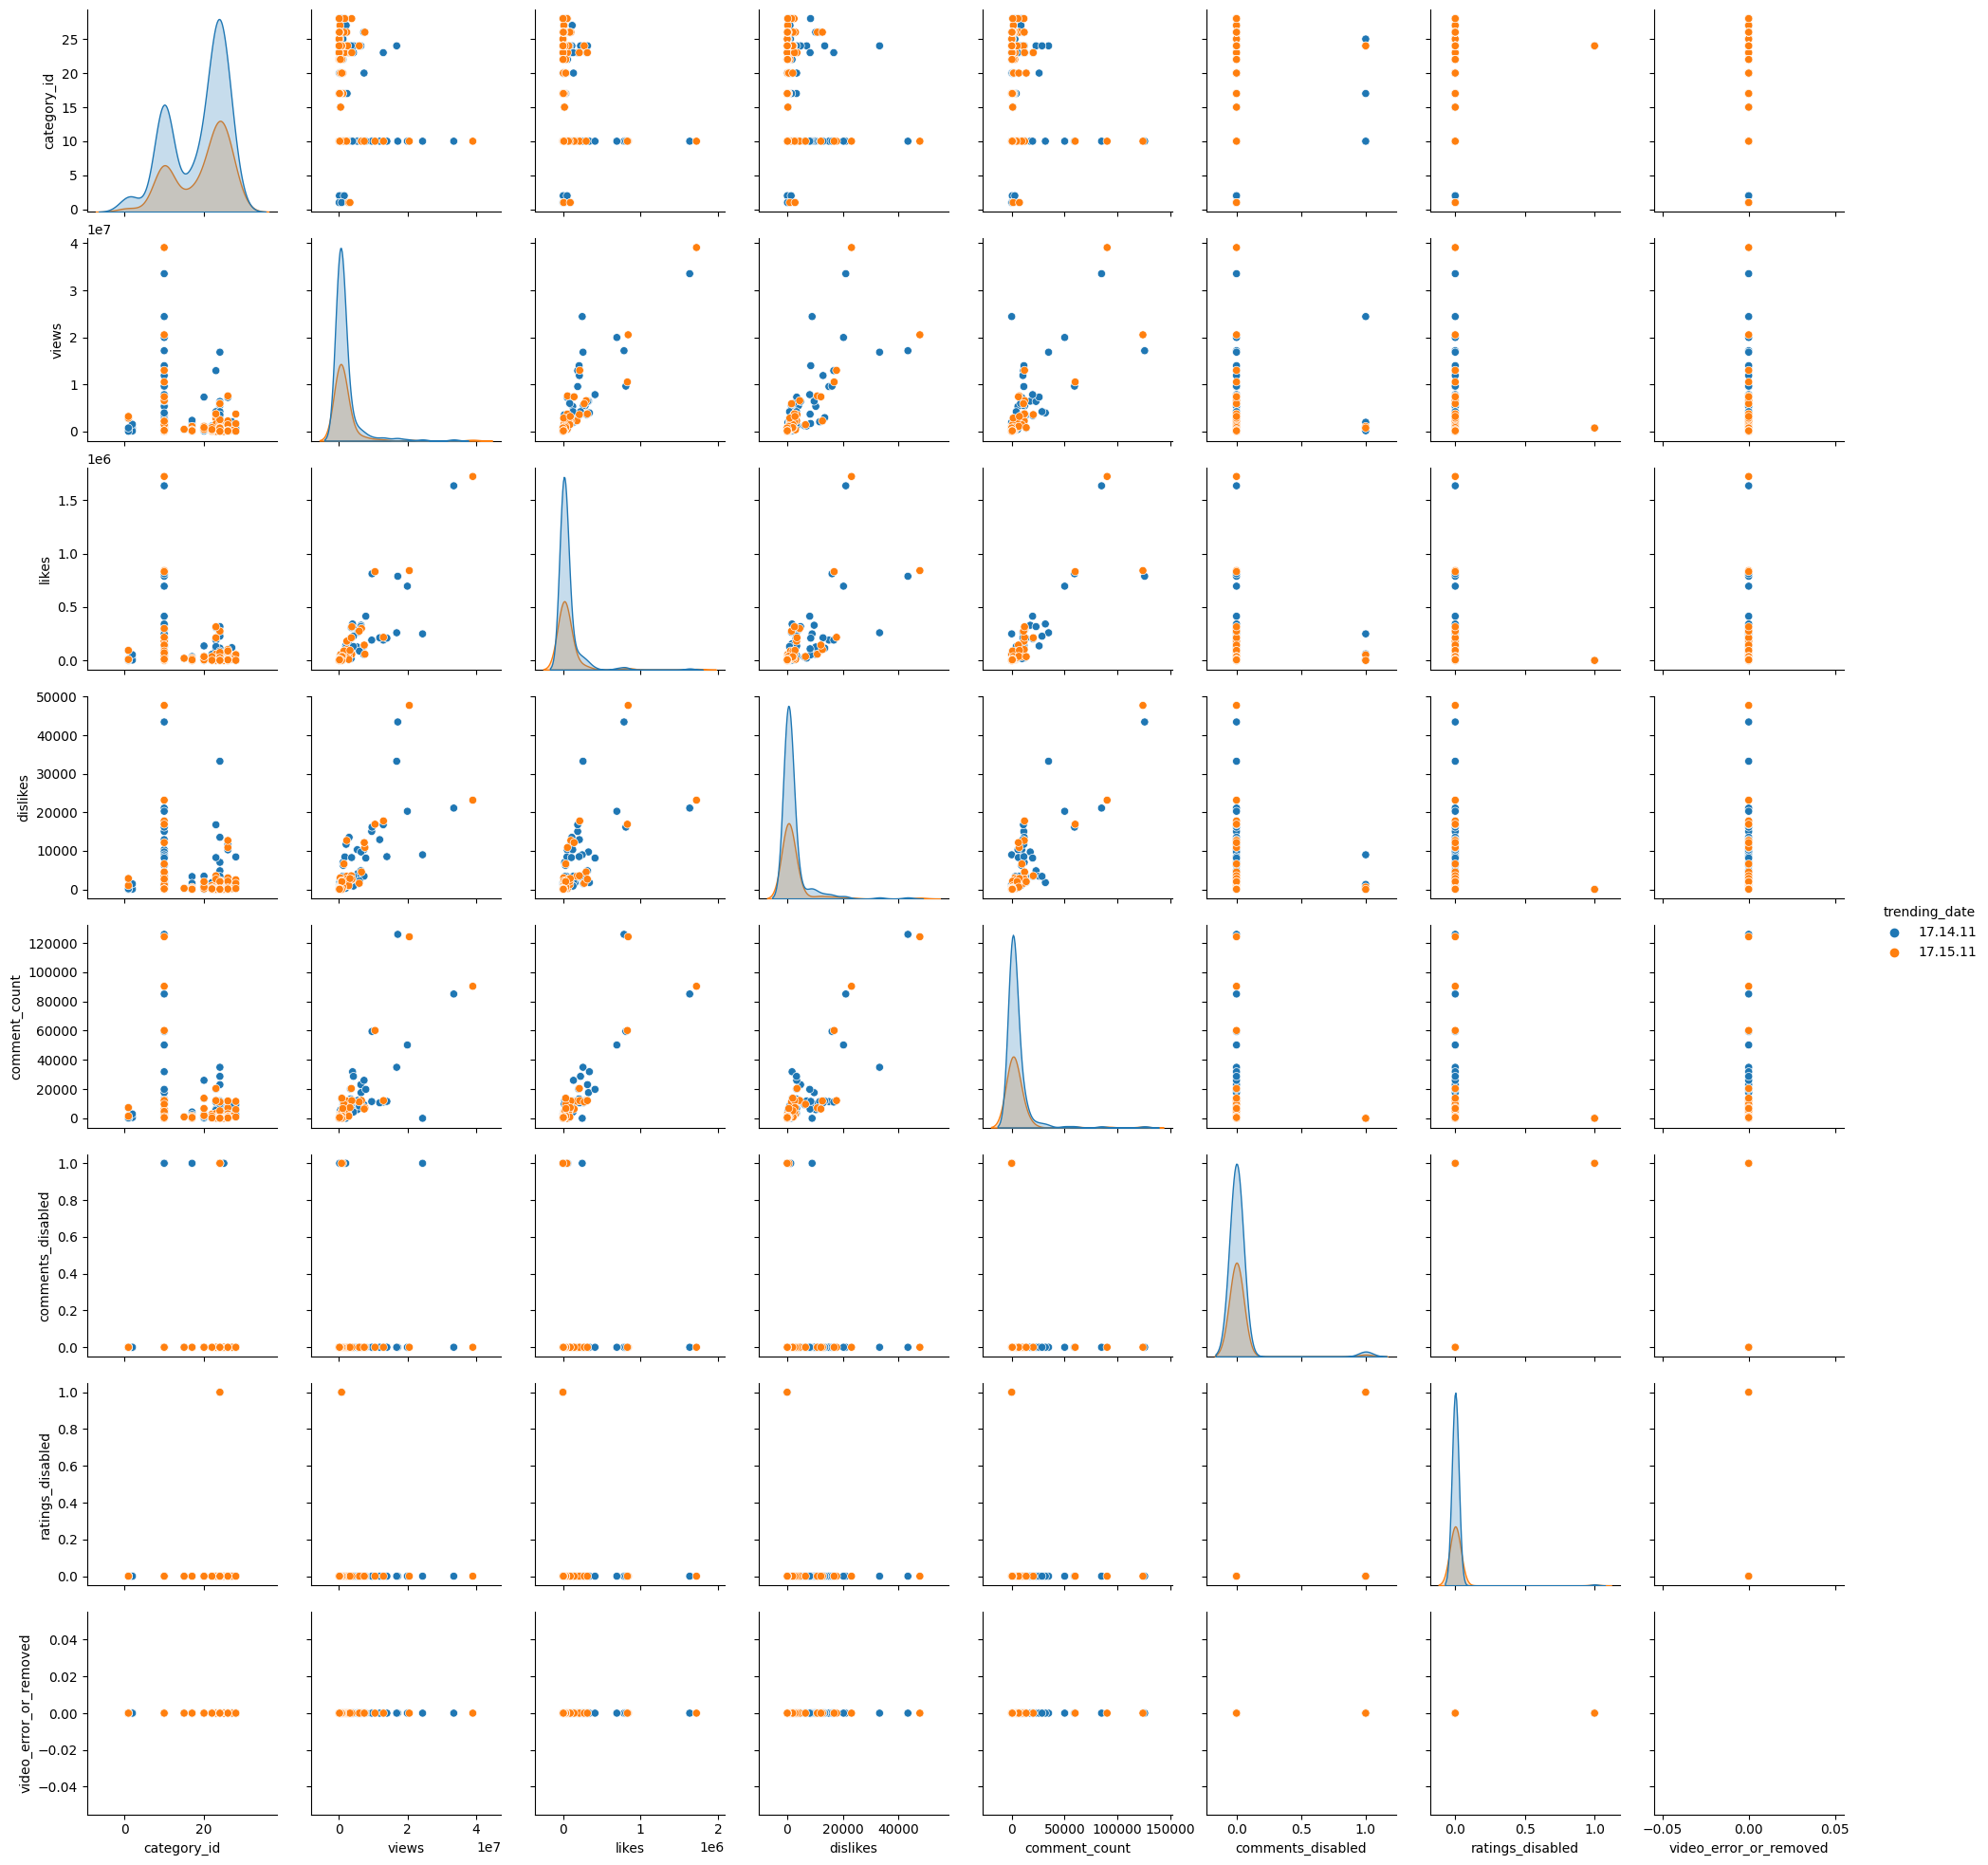

In [5]:
# Yukarıdaki matrise trending_date bilgisini de ekleyelim.
sns.pairplot(youtube.head(300), hue = "trending_date"); # ilk 300 kayıt için matris saçılım grafiğini göstermektedir.

likes, dislikes, comment_count gibi değişkenler artsa bile videonun hatalı olma veya videonun kaldırılma ihtimalini etkilememektedir. Aynı şekilde yorumun ve değerlendirmenin(comments_disabled, ratings_disabled) devre dışı bırakılma özelliğini de etkilememektedir.

### 6.2. Çizgi Grafiği

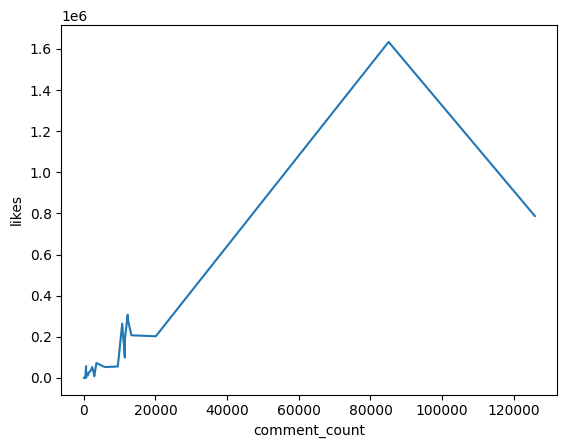

In [2]:
# Yorum sayısı ile beğeni arasındaki ilişkiyi (ilk 30 kayıt için) çizgi grafiği şeklinde gösterir.
sns.lineplot(x = "comment_count", y = "likes", data = youtube.head(30));

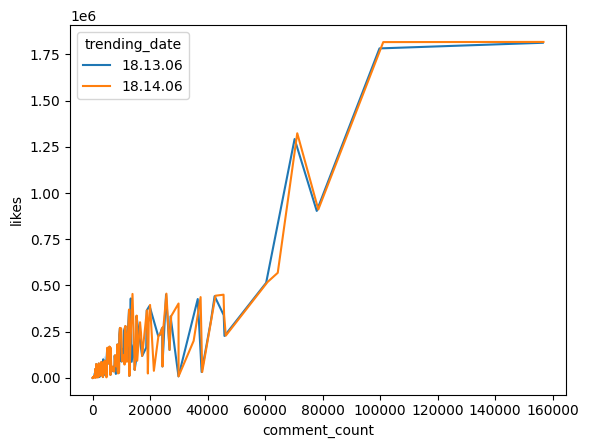

In [6]:
# Yorum sayısı ile beğeni arasındaki ilişkiye trending_date eklenerek çizgi grafiği şeklinde göstermektedir (son 300 kayıt için)
sns.lineplot(x = "comment_count", y = "likes", hue="trending_date", data = youtube.tail(300));

### 6.3. Basit Zaman Serisi Grafiği

In [8]:
# Burada herhangi hücre içerisine  yazarak veya+
# komut satırına pip install pandas_datareader yazarak indirilmelidir. 

!pip install pandas_datareader


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


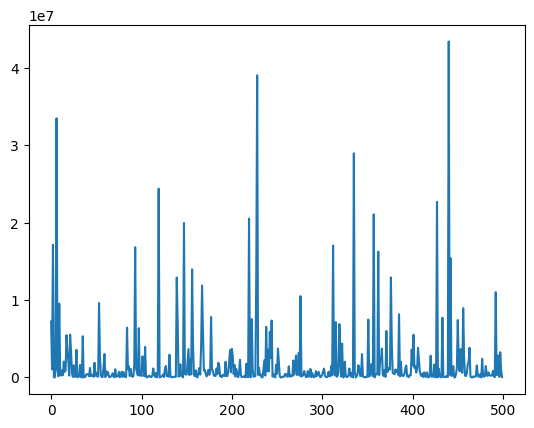

In [14]:
# Görüntülenme sayısının ilk 500 kayıt için zaman serisi grafiğini göstermektedir.
youtube["views"].head(500).plot(); 